In [ ]:
import random
import numpy as np

In [ ]:
class GridWorld():
  def __init__(self):
    self.x=0
    self.y=0

  def step(self,a):
    # 0번 액션 : 왼쪽, 1번 액션 : 위, 2번 액션 : 오른쪽, 3번 액션 :  아래쪽
    if a==0:
      self.move_left()
    elif a==1:
      self.move_up()
    elif a==2:
      self.move_right()
    elif a==3:
      self.move_down()
    reward = -1 # 보상은 항상 -1로 고정
    done = self.is_done()
    return (self.x, self.y), reward, done

  def move_left(self):
    if self.y==0:
      pass
    elif self.y==3 and self.x in [0,1,2]:
      pass
    elif self.y==5 and self.x in [2,3,4]:
      pass
    else:
      self.y -=1

  def move_right(self):
    if self.y==1 and self.x in [0,1,2]:
      pass
    elif self.y==3 and self.x in [2,3,4]:
      pass
    elif self.y==6:
      pass
    else:
      self.y +=1

  def move_up(self):
    if self.x==0:
      pass
    elif self.x==3 and self.y==2:
      pass
    else:
      self.x -=1

  def move_down(self):
    if self.x==4:
      pass
    elif self.x==1 and self.y==4:
      pass
    else:
      self.x +=1

  def is_done(self):
    if self.x==4 and self.y==6: # 목표지점인 (4,6)에 도달하면 끝남
      return True
    else:
      return False

  def reset(self):
    self.x=0
    self.y=0
    return (self.x, self.y)

In [ ]:
class QAgent():
  def __init__(self):
    self.q_table = np.zeros((5,7,4)) # q벨류를 저장하는 변수, 모두 0으로 초기화
    self.eps=0.9
    self.alpha=0.01

  def select_action(self,s):
    # eps-greedy로 액션을 선택
    x,y=s
    coin = random.random()
    if coin < self.eps:
      action = random.randint(0,3)
    else:
      action_val = self.q_table[x,y,:]
      action = np.argmax(action_val)
    return action

  def updat_table(self,history):
    # 한 에피소드에 해당하는 history를 입력으로 받아 q 테이블의 값을 업데이트 한다
      cum_reward=0

      for transition in history[::-1]:
        s,a,r,s_prime = transition
        x,y=s

        #몬테 카를로 방식을 이용하여 업데이트
        self.q_table[x,y,a] = self.q_table[x,y,a] + self.alpha * (cum_reward - self.q_table[x,y,a])
        cum_reward = cum_reward + r

  def anneal_eps(self):
    self.eps -=0.03
    self.eps = max(self.eps,0.1)

  def show_table(self):
    # 학습이 각 위치에서 어느 액션의 q값이 가장 높았는지 보여주는 함수
      q_list = self.q_table.tolist()
      data = np.zeros((5,7))
      for row_idx in range(len(q_list)):
        row=q_list[row_idx]
        for col_idx in range(len(row)):
          col = row[col_idx]
          action = np.argmax(col)
          data[row_idx, col_idx] = action
      print(data)


In [ ]:
def main():
  env = GridWorld()
  agent = QAgent()
  for n_epi in range(1000): # 총 1000 에피소드 동안 학습
    done = False
    history=[]
    s=env.reset()
    while not done: # 한 에피소드가 끝날 때까지
      a=agent.select_action(s)
      s_prime, r, done = env.step(a)
      history.append((s,a,r,s_prime))
      s=s_prime
    agent.updat_table(history) #히스토리를 이용하여 에이전트를 업데이트
    agent.anneal_eps()
  agent.show_table() #학습이 끝난 결과를 출력

if __name__=='__main__':
  main()

[[2. 3. 0. 2. 3. 0. 3.]
 [3. 3. 0. 2. 2. 2. 3.]
 [3. 0. 0. 1. 0. 3. 3.]
 [2. 2. 3. 1. 0. 3. 3.]
 [2. 3. 2. 1. 0. 2. 0.]]


# SARSA 코딩

In [1]:
import random
import numpy as np

class GridWorld():
  def __init__(self):
    self.x=0
    self.y=0

  def step(self,a):
    # 0번 액션 : 왼쪽, 1번 액션 : 위, 2번 액션 : 오른쪽, 3번 액션 :  아래쪽
    if a==0:
      self.move_left()
    elif a==1:
      self.move_up()
    elif a==2:
      self.move_right()
    elif a==3:
      self.move_down()
    reward = -1 # 보상은 항상 -1로 고정
    done = self.is_done()
    return (self.x, self.y), reward, done

  def move_left(self):
    if self.y==0:
      pass
    elif self.y==3 and self.x in [0,1,2]:
      pass
    elif self.y==5 and self.x in [2,3,4]:
      pass
    else:
      self.y -=1

  def move_right(self):
    if self.y==1 and self.x in [0,1,2]:
      pass
    elif self.y==3 and self.x in [2,3,4]:
      pass
    elif self.y==6:
      pass
    else:
      self.y +=1

  def move_up(self):
    if self.x==0:
      pass
    elif self.x==3 and self.y==2:
      pass
    else:
      self.x -=1

  def move_down(self):
    if self.x==4:
      pass
    elif self.x==1 and self.y==4:
      pass
    else:
      self.x +=1

  def is_done(self):
    if self.x==4 and self.y==6: # 목표지점인 (4,6)에 도달하면 끝남
      return True
    else:
      return False

  def reset(self):
    self.x=0
    self.y=0
    return (self.x, self.y)

In [2]:
class QAgent():
  def __init__(self):
    self.q_table = np.zeros((5,7,4)) # q벨류를 저장하는 변수, 모두 0으로 초기화
    self.eps=0.9

  def select_action(self,s):
    # eps-greedy로 액션을 선택
    x,y=s
    coin = random.random()
    if coin < self.eps:
      action = random.randint(0,3)
    else:
      action_val = self.q_table[x,y,:]
      action = np.argmax(action_val)
    return action

  def updat_table(self,transition):
      s,a,r,s_prime = transition
      x,y=s
      next_x,next_y = s_prime
      a_prime = self.select_action(s_prime) #S'에서 선택할 액션(실제로 취한 액션이 아님)

      #SARSA 업데이트 식을 이용
      self.q_table[x,y,a] = self.q_table[x,y,a] + 0.1 * (r+self.q_table[next_x,next_y,a_prime]-self.q_table[x,y,a])

  def anneal_eps(self):
    self.eps -=0.03
    self.eps = max(self.eps,0.1)

  def show_table(self):
    # 학습이 각 위치에서 어느 액션의 q값이 가장 높았는지 보여주는 함수
      q_list = self.q_table.tolist()
      data = np.zeros((5,7))
      for row_idx in range(len(q_list)):
        row=q_list[row_idx]
        for col_idx in range(len(row)):
          col = row[col_idx]
          action = np.argmax(col)
          data[row_idx, col_idx] = action
      print(data)


In [4]:
def main():
  env = GridWorld()
  agent = QAgent()
  for n_epi in range(1000): # 총 1000 에피소드 동안 학습
    done = False
    s=env.reset()
    while not done: # 한 에피소드가 끝날 때까지
      a=agent.select_action(s)
      s_prime, r, done = env.step(a)
      agent.updat_table((s,a,r,s_prime))
      s=s_prime
    agent.anneal_eps()
  agent.show_table() #학습이 끝난 결과를 출력

if __name__=='__main__':
  main()

[[3. 3. 0. 2. 2. 3. 3.]
 [2. 3. 0. 2. 2. 3. 3.]
 [3. 3. 0. 1. 0. 3. 3.]
 [2. 2. 2. 1. 0. 2. 3.]
 [2. 2. 1. 1. 0. 2. 0.]]


# Q러닝

In [5]:
import random
import numpy as np

class GridWorld():
  def __init__(self):
    self.x=0
    self.y=0

  def step(self,a):
    # 0번 액션 : 왼쪽, 1번 액션 : 위, 2번 액션 : 오른쪽, 3번 액션 :  아래쪽
    if a==0:
      self.move_left()
    elif a==1:
      self.move_up()
    elif a==2:
      self.move_right()
    elif a==3:
      self.move_down()
    reward = -1 # 보상은 항상 -1로 고정
    done = self.is_done()
    return (self.x, self.y), reward, done

  def move_left(self):
    if self.y==0:
      pass
    elif self.y==3 and self.x in [0,1,2]:
      pass
    elif self.y==5 and self.x in [2,3,4]:
      pass
    else:
      self.y -=1

  def move_right(self):
    if self.y==1 and self.x in [0,1,2]:
      pass
    elif self.y==3 and self.x in [2,3,4]:
      pass
    elif self.y==6:
      pass
    else:
      self.y +=1

  def move_up(self):
    if self.x==0:
      pass
    elif self.x==3 and self.y==2:
      pass
    else:
      self.x -=1

  def move_down(self):
    if self.x==4:
      pass
    elif self.x==1 and self.y==4:
      pass
    else:
      self.x +=1

  def is_done(self):
    if self.x==4 and self.y==6: # 목표지점인 (4,6)에 도달하면 끝남
      return True
    else:
      return False

  def reset(self):
    self.x=0
    self.y=0
    return (self.x, self.y)

In [6]:
class QAgent():
  def __init__(self):
    self.q_table = np.zeros((5,7,4)) # q벨류를 저장하는 변수, 모두 0으로 초기화
    self.eps=0.9

  def select_action(self,s):
    # eps-greedy로 액션을 선택
    x,y=s
    coin = random.random()
    if coin < self.eps:
      action = random.randint(0,3)
    else:
      action_val = self.q_table[x,y,:]
      action = np.argmax(action_val)
    return action

  def updat_table(self,transition):
      s,a,r,s_prime = transition
      x,y=s
      next_x,next_y = s_prime
      a_prime = self.select_action(s_prime) #S'에서 선택할 액션(실제로 취한 액션이 아님)

      #Q러닝 업데이트 식을 이용
      self.q_table[x,y,a] = self.q_table[x,y,a] + 0.1 * (r+np.amax(self.q_table[next_x,next_y,:])-self.q_table[x,y,a])

  def anneal_eps(self):
    self.eps -=0.01 #Q러닝에서는 epsilon이 좀 더 천천히 줄어 들도록 함
    self.eps = max(self.eps,0.1)

  def show_table(self):
    # 학습이 각 위치에서 어느 액션의 q값이 가장 높았는지 보여주는 함수
      q_list = self.q_table.tolist()
      data = np.zeros((5,7))
      for row_idx in range(len(q_list)):
        row=q_list[row_idx]
        for col_idx in range(len(row)):
          col = row[col_idx]
          action = np.argmax(col)
          data[row_idx, col_idx] = action
      print(data)


In [7]:
def main():
  env = GridWorld()
  agent = QAgent()
  for n_epi in range(1000): # 총 1000 에피소드 동안 학습
    done = False
    s=env.reset()
    while not done: # 한 에피소드가 끝날 때까지
      a=agent.select_action(s)
      s_prime, r, done = env.step(a)
      agent.updat_table((s,a,r,s_prime))
      s=s_prime
    agent.anneal_eps()
  agent.show_table() #학습이 끝난 결과를 출력

if __name__=='__main__':
  main()

[[2. 3. 0. 0. 2. 2. 3.]
 [3. 3. 0. 2. 2. 3. 3.]
 [3. 3. 0. 1. 0. 2. 3.]
 [2. 2. 2. 1. 0. 3. 3.]
 [0. 0. 1. 1. 0. 2. 0.]]


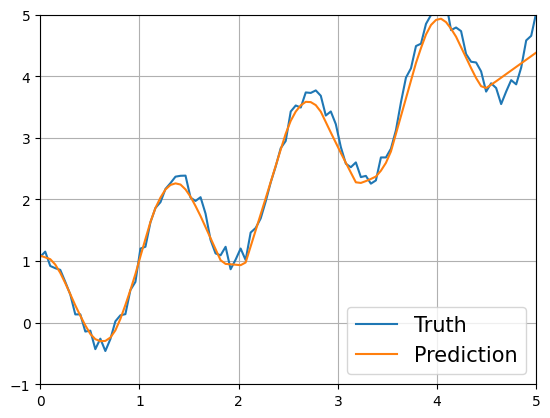

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.fc1 = nn.Linear(1,128)
    self.fc2 = nn.Linear(128,128)
    self.fc3 = nn.Linear(128,128)
    self.fc4 = nn.Linear(128,1,bias=False)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.fc4(x)
    return x

def true_fun(x):
  noise = np.random.rand(x.shape[0])*0.4-0.2
  return np.cos(1.5*np.pi*x)+x+noise

def plot_results(model):
  x=np.linspace(0,5,100)
  input_x = torch.from_numpy(x).float().unsqueeze(1)
  plt.plot(x,true_fun(x),label="Truth")
  plt.plot(x,model(input_x).detach().numpy(),label="Prediction")
  plt.legend(loc='lower right',fontsize=15)
  plt.xlim((0,5))
  plt.ylim((-1,5))
  plt.grid()

def main():
  data_x = np.random.rand(10000)*5 #0~5사이 숫자 1만개를 샘플링하여 인풋으로 사용
  model = Model()
  optimizer = optim.Adam(model.parameters(),lr=0.001)
  for step in range(10000):
    batch_x =np.random.choice(data_x,32) #랜덤하게 뽑힌 32개의 데이터로 mini-batch구성
    batch_x_tensor = torch.from_numpy(batch_x).float().unsqueeze(1)
    pred = model(batch_x_tensor)
    batch_y = true_fun(batch_x)
    truth = torch.from_numpy(batch_y).float().unsqueeze(1)
    loss = F.mse_loss(pred,truth) #손실함수인 MSE를 계산하는 부분

    optimizer.zero_grad()
    loss.mean().backward() #역전파를 통한 그레디언트 계산이 일어나는 부분
    optimizer.step() #실제로 파라미터를 업데이트 하는 부분
  plot_results(model)

if __name__=='__main__':
  main()